In [37]:
#Analysis by writing Cypher queries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
import warnings
import os
from pandas import DataFrame

warnings.filterwarnings('ignore')
%matplotlib inline

In [39]:
from neo4j import GraphDatabase
class Neo4jConnection:
    
    def __init__(self, uri, user, pwd):
        self.__uri = uri
        self.__user = user
        self.__pwd = pwd
        self.__driver = None
        try:
            self.__driver = GraphDatabase.driver(self.__uri, auth=(self.__user, self.__pwd))
        except Exception as e:
            print("Failed to create the driver:", e)
        
    def close(self):
        if self.__driver is not None:
            self.__driver.close()
        
    def query(self, query, db=None):
        assert self.__driver is not None, "Driver not initialized!"
        session = None
        response = None
        try: 
            session = self.__driver.session(database=db) if db is not None else self.__driver.session() 
            response = list(session.run(query))
        except Exception as e:
            print("Query failed:", e)
        finally: 
            if session is not None:
                session.close()
        return response

In [40]:
conn = Neo4jConnection(uri="bolt://localhost:7687", user="neo4j", pwd="groupproject")

In [41]:
query_string = '''
MATCH (case:Case)-[:Is]->(Type)
RETURN case.year, Type.name
'''
dtf_data = DataFrame([dict(_) for _ in conn.query(query_string, db='neo4j')])
dtf_data.columns = ['Year', 'class_of_admission']

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Visa type')]

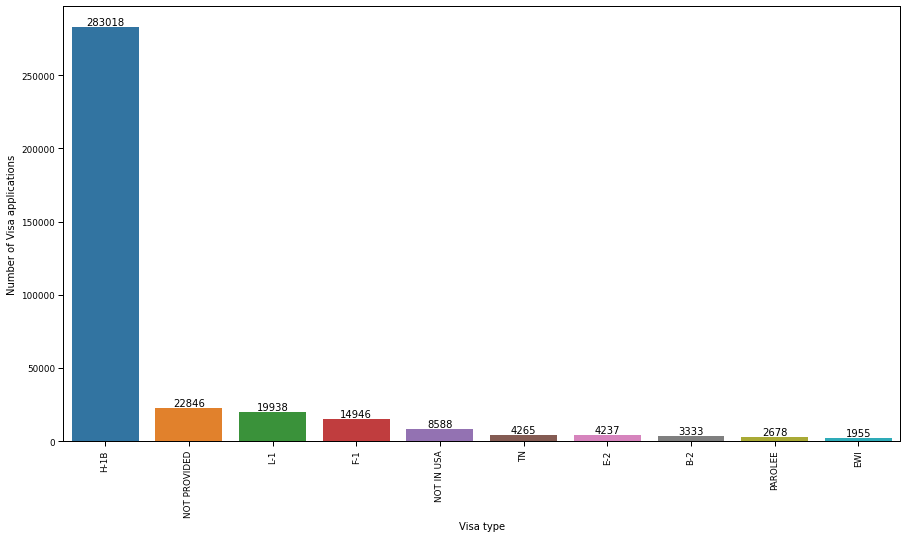

In [42]:
#Number of applications with respect to Visa Type
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x='class_of_admission',data=dtf_data, 
              order=dtf_data.class_of_admission.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
 
for i, v in dtf_data.class_of_admission.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.class_of_admission,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Visa type', ylabel='Number of Visa applications')

In [43]:
query_string = '''
MATCH (case:Case)-[:Has]->(Wage)
RETURN case.year, Wage.range
'''
dtf_data_1 = DataFrame([dict(_) for _ in conn.query(query_string, db='neo4j')])
dtf_data_1.columns = ['Year', 'Salary_range']

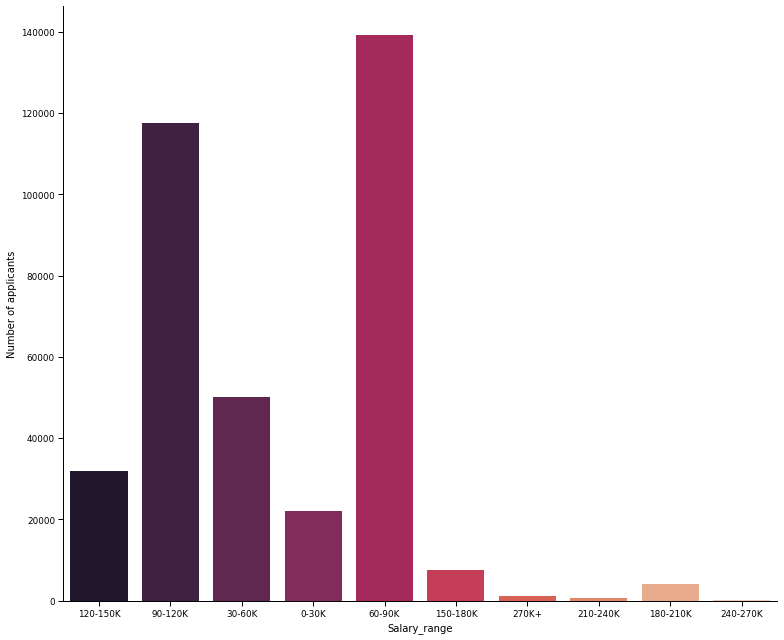

In [44]:
##Number of applications with respect to salary range
g = sns.factorplot(x='Salary_range', data=dtf_data_1, kind="count",
                   palette="rocket", size=9, aspect=1.2)

g.set(xlabel='Salary_range', ylabel='Number of applicants')

In [45]:
query_string = '''
MATCH (case:Case)<-[:To]-(Decision)
RETURN case.year, Decision.status
'''
dtf_data_1 = DataFrame([dict(_) for _ in conn.query(query_string, db='neo4j')])
dtf_data_1.columns = ['Year', 'status']

[Text(0, 0.5, 'Number of Applications'), Text(0.5, 0, 'Application Year')]

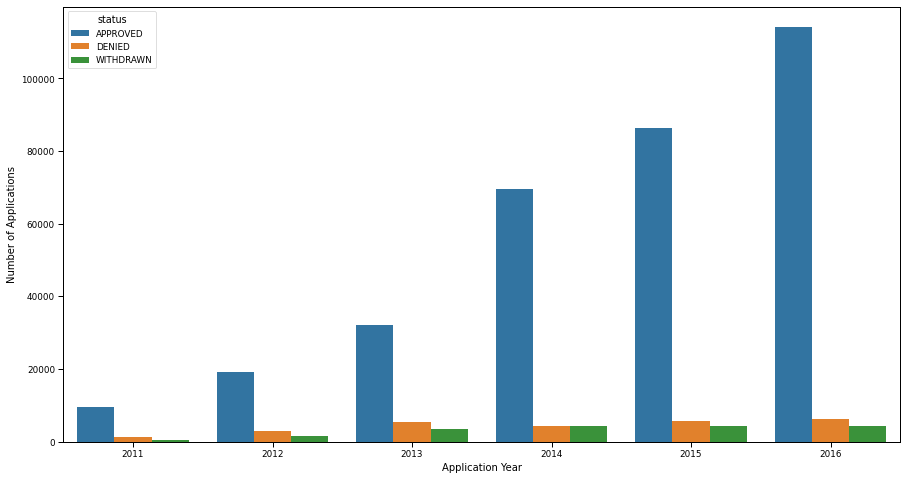

In [46]:
#Case Status plot
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_context(rc={"font.size":10})
sns.countplot(x="Year", hue="status", data=dtf_data_1)
ax.set(xlabel='Application Year', ylabel='Number of Applications')

In [47]:
query_string = '''
MATCH (case:Case)-[:Sponsor]->(Employer)
RETURN case.year, Employer.name
'''
dtf_data_2 = DataFrame([dict(_) for _ in conn.query(query_string, db='neo4j')])
dtf_data_2.columns = ['Year', 'employer_name']

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Employer name')]

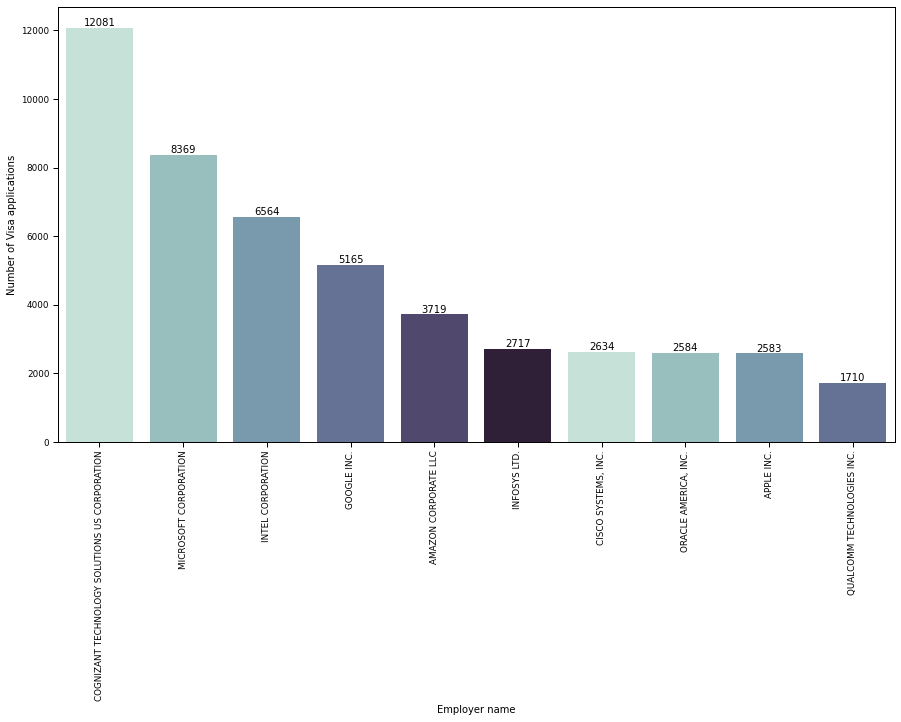

In [48]:
#Number of applications with respect to employer
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_context(rc={"font.size":10,"axes.labelsize":10})
sns.countplot(x='employer_name', data=dtf_data_2, palette = sns.cubehelix_palette(start=.5, rot=-.5), order=dtf_data_2.employer_name.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

for i, v in dtf_data_2.employer_name.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.employer_name,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Employer name', ylabel='Number of Visa applications')

In [49]:
query_string = '''
MATCH (case:Case)-[:Sponsor]->(Employer)
RETURN case.year, Employer.city
'''
dtf_data_city = DataFrame([dict(_) for _ in conn.query(query_string, db='neo4j')])
dtf_data_city.columns = ['applied_year', 'employer_city']

[Text(0, 0.5, 'Number of Applications'), Text(0.5, 0, 'Employer city')]

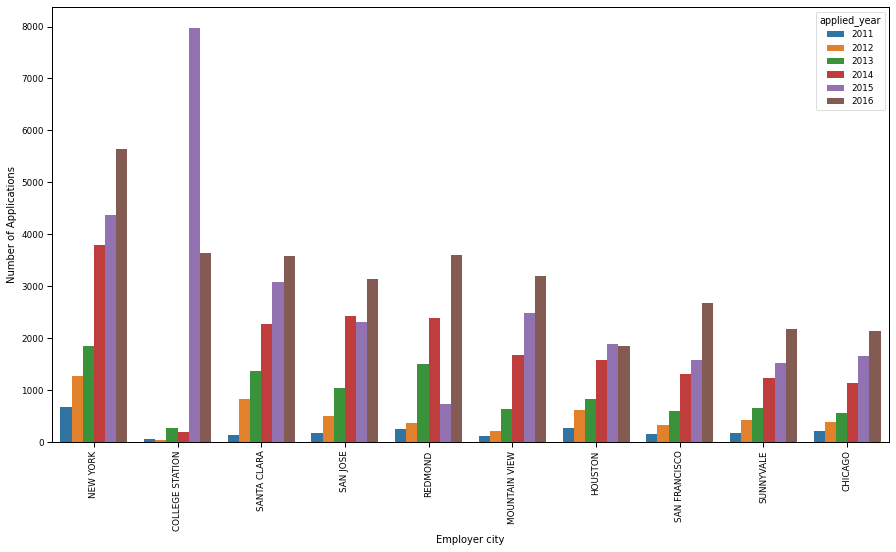

In [50]:
#Number of applications with respect to city
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10})
sns.countplot(x='employer_city', hue='applied_year', data=dtf_data_city, order=dtf_data_city.employer_city.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
ax.set(xlabel='Employer city', ylabel='Number of Applications')

In [51]:
query_string = '''
MATCH (case:Case)-[:For]->(Job)
RETURN case.year, Job.title
'''
dtf_data_title = DataFrame([dict(_) for _ in conn.query(query_string, db='neo4j')])
dtf_data_title.columns = ['applied_year', 'job_info_job_title']

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Job Title')]

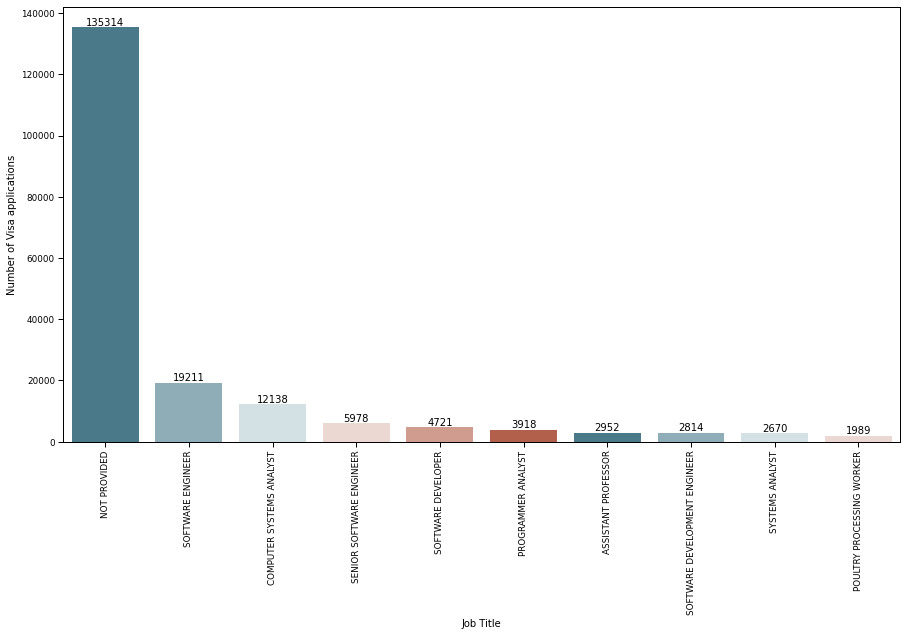

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

sns.countplot(x='job_info_job_title',data=dtf_data_title, 
               palette = sns.diverging_palette(220, 20), 
               order=dtf_data_title.job_info_job_title.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

for i, v in dtf_data_title.job_info_job_title.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.job_info_job_title,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Job Title', ylabel='Number of Visa applications')

In [53]:
query_string = '''
MATCH (case:Case)-[:Citizenship]->(Country), (case:Case)<-[:To]-(Decision), (case:Case)-[:Sponsor]->(Employer), (case:Case)-[:Is]->(Type), (case:Case)-[:For]->(Job)
RETURN case.year, Country.name, Decision.status, Employer.name, Employer.state, Employer.city, Type.name, Job.title
'''
dtf_data_Final = DataFrame([dict(_) for _ in conn.query(query_string, db='neo4j')])
dtf_data_Final.columns = ['applied_year', 'case_status', 'country_of_citizenship', 'employer_name', 'employer_state', 'employer_city', 'class_of_admission', 'pw_soc_title']
dtf_data_Final

,applied_year,case_status,country_of_citizenship,employer_name,employer_state,employer_city,class_of_admission,pw_soc_title
0,2015,INDIA,APPROVED,"ZTI MERGER SUBSIDIARY III, INC.,",CA,OAKLAND,H-1B,ZMS SOFTWARE ENGINEER
1,2016,IRAN,APPROVED,"ZTI MERGER SUBSIDIARY III, INC.,",CA,OAKLAND,H-1B,ZMS SOFTWARE ENGINEER
2,2016,INDIA,APPROVED,"AIG GLOBAL SERVICES, INC.",NY,NEW YORK,H-1B,ZLINUX ENGINEER
3,2016,INDIA,APPROVED,"INTERMODAL DATA, INC",CA,SANTA CLARA,H-1B,ZFS STORAGE TEST AUTOMATION SOFTWARE ENGINEER
4,2014,SWEDEN,APPROVED,SKILLMAN TENNIS ASSOCIATES LLC,NY,LONG ISLAND CITY,H-1B,YOUTH TENNIS PROGRAM DIRECTOR
...,...,...,...,...,...,...,...,...
414647,2015,INDIA,APPROVED,"TESORO COMPANIES, INC.",TX,SAN ANTONIO,H-1B,78259
414648,2016,HONDURAS,DENIED,RODRIGO GONZALEZ DBA NORTH COUNTY TILE,AR,CONWAY,NOT PROVIDED,72032
414649,2014,MEXICO,APPROVED,MURPHY BROWN LLC,NC,ROSE HILL,H-1B,"10,000"
414650,2016,JORDAN,APPROVED,BOLD HOLDINGS LLC,PR,GUAYNABO,H-1B,901
